In [21]:
from typing import List
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [11]:
config_dirs = [
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab2/codes/cache/', 
]

spec_names = sorted([
    'drmemtrace.omnetpp.552936.5555.dir',
    'drmemtrace.sgcc_base.mytest-m64.555062.6619.dir',
    'drmemtrace.specrand_i.553922.3230.dir',
    'drmemtrace.perlbench_s_base.mytest-m64.554262.0160.dir',
    'drmemtrace.leela_s_base.mytest-m64.555086.8417.dir',
    'drmemtrace.x264.555077.8155.dir',
    'drmemtrace.deepsjeng.553743.1618.dir',
    'drmemtrace.exchange2.553888.1738.dir',
    'drmemtrace.mcf_s_base.mytest-m64.554166.9011.dir',
    'drmemtrace.xalancbmk_s_base.mytest-m64.555084.9837.dir'
])

image_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/images/'

In [12]:
def get_simple_name(spec_path: str) -> str:
    return spec_path.split('.')[1]

In [13]:
configs = [F'config_{i}' for i in range(1, 8)]
simple_names = [get_simple_name(spec) for spec in spec_names]

In [18]:
def extract_one_spec(spec: str) -> List[float]:
    ipc_dict = dict()
    dcms_dict = dict()
    cold_dict = dict()
    cpt_dict = dict()
    cft_dict = dict()
    for i, config in enumerate(config_dirs):
        stat_path = F'{config}{spec}/memory.stat.0.out'
        mem_file = open(stat_path)
        m_lines = mem_file.readlines()
        key = F'config_{i + 1}'
        ipc_dict[key] = float(m_lines[4].split()[-1])
        dcms_dict[key] = float(m_lines[31].split()[2][:-1])
        cold_dict[key] = float(m_lines[37].split()[1])
        cpt_dict[key] = float(m_lines[39].split()[1])
        cft_dict[key] = float(m_lines[41].split()[1])
    return ipc_dict, dcms_dict, cold_dict, cpt_dict, cft_dict

In [22]:
spec_data = defaultdict(dict)
for spec in spec_names:
    data_lst = extract_one_spec(spec)
    spec_data[get_simple_name(spec)]['ipc'] = data_lst[0]
    spec_data[get_simple_name(spec)]['dcms'] = data_lst[1]
    spec_data[get_simple_name(spec)]['cold'] = data_lst[2]
    spec_data[get_simple_name(spec)]['cpt'] = data_lst[3]
    spec_data[get_simple_name(spec)]['cft'] = data_lst[4]

In [50]:
ipc_df = pd.DataFrame({key: spec_data[key]['ipc'] for key in spec_data})
dcms_df = pd.DataFrame({key: spec_data[key]['dcms'] for key in spec_data})
cold_df = pd.DataFrame({key: spec_data[key]['cold'] for key in spec_data})
cpt_df = pd.DataFrame({key: spec_data[key]['cpt'] for key in spec_data})
cft_df = pd.DataFrame({key: spec_data[key]['cft'] for key in spec_data})

ipc_df['average'] = ipc_df.mean(1)
dcms_df['average'] = dcms_df.mean(1)
cold_df['average'] = cold_df.mean(1)
cpt_df['average'] = cpt_df.mean(1)
cft_df['average'] = cft_df.mean(1)

In [51]:
ipc_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
config_1,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826
config_2,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826
config_3,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826
config_4,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826
config_5,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826
config_6,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826
config_7,0.88744,1.6884,0.84437,0.30987,0.79051,0.31103,0.41385,1.60217,1.67122,0.6494,0.916826


In [52]:
dcms_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
config_1,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384
config_2,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384
config_3,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384
config_4,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384
config_5,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384
config_6,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384
config_7,2.137,0.53,2.91,56.442,5.755,5.206,4.503,1.828,1.58,35.493,11.6384


In [53]:
cold_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
config_1,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1
config_2,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1
config_3,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1
config_4,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1
config_5,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1
config_6,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1
config_7,280.0,60.0,247.0,95.0,312.0,843.0,717.0,110.0,15.0,32.0,271.1


In [54]:
cpt_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
config_1,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0
config_2,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0
config_3,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0
config_4,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0
config_5,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0
config_6,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0
config_7,510.0,121.0,747.0,22681.0,2303.0,1434.0,1156.0,484.0,476.0,11058.0,4097.0


In [55]:
cft_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
config_1,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0
config_2,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0
config_3,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0
config_4,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0
config_5,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0
config_6,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0
config_7,18.0,0.0,46.0,44.0,90.0,83.0,219.0,0.0,0.0,0.0,50.0


In [65]:
list(ipc_df.loc['config_1'])

[0.88744,
 1.6884,
 0.84437,
 0.30987,
 0.79051,
 0.31103,
 0.41385,
 1.60217,
 1.67122,
 0.6494,
 0.916826]

[ 1  9 17 25 33 41 49 57 65 73 81]


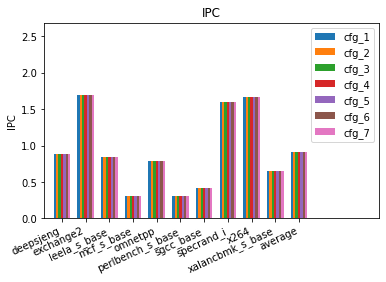

In [140]:
    specs = simple_names + ['average']
    x = np.arange(start = 1, stop = len(specs) * 8, step = 8)
    print(x)
    width = 0.8
    sinlge_width = 0.8
    fig, ax = plt.subplots()
    plt.xlim((-5, 108))
    plt.ylim((0, max(list(ipc_df.loc['config_1'])) + 1))
    
    rects1 = ax.bar(x - width * 3, list(ipc_df.loc['config_1']), sinlge_width, label='cfg_1', in_layout=False)
    rects2 = ax.bar(x - width * 2, list(ipc_df.loc['config_2']), sinlge_width, label='cfg_2', in_layout=False)
    rects3 = ax.bar(x - width, list(ipc_df.loc['config_3']), sinlge_width, label='cfg_3', in_layout=False)
    rects4 = ax.bar(x, list(ipc_df.loc['config_4']), sinlge_width, label='cfg_4', in_layout=False)
    rects5 = ax.bar(x + width, list(ipc_df.loc['config_5']), sinlge_width, label='cfg_5', in_layout=False)
    rects6 = ax.bar(x + width * 2, list(ipc_df.loc['config_6']), sinlge_width, label='cfg_6', in_layout=False)
    rects7 = ax.bar(x + width * 3, list(ipc_df.loc['config_7']), sinlge_width, label='cfg_7', in_layout=False)
    
    ax.set_ylabel('IPC')
    ax.set_title('IPC')
    ax.set_xticks(x, specs)
    ax.legend(loc='upper right')
    fig.autofmt_xdate()
    plt.subplots_adjust(bottom=0.2)
    plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
#     plt.show()
    plt.savefig(F'test', dpi=300)

In [94]:
np.arange?

In [120]:
ax.bar?